# Alternative Modeling (IN PROGRESS)

The initial model was geared towards creating a home-value calculator.  In practice, the calculator was not  accurate; I'm not sure that it represented the best use of linear regression (using the model to predict price, especially for such a non-specific model).  So, I wanted to go back and create the model without the zip codes and with the intent of identifying which features which had the greatest effect on price. 

In [46]:
features_v2 = features[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'condition', 'grade', 'sqft_basement', 'yr_built', 'log_sqft_lot']].copy()
f_v2_heatmap = features_v2
f_v2_heatmap['price'] = df[['price']]

In [47]:
features_v2

,bedrooms,bathrooms,sqft_living,floors,waterfront,condition,grade,sqft_basement,yr_built,log_sqft_lot,price
0,3,1.00,1180,1.0,0.0,3,7,0.0,1955,8.639411,221900.0
1,3,2.25,2570,2.0,0.0,3,7,400.0,1951,8.887653,538000.0
4,3,2.00,1680,1.0,0.0,3,8,0.0,1987,8.997147,510000.0
6,3,2.25,1715,2.0,0.0,3,7,0.0,1995,8.827468,257500.0
7,3,1.50,1060,1.0,0.0,3,7,0.0,1963,9.181015,291850.0
...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,3.0,0.0,3,8,0.0,2009,7.030857,360000.0
21593,4,2.50,2310,2.0,0.0,3,8,0.0,2014,8.667852,400000.0
21594,2,0.75,1020,2.0,0.0,3,7,0.0,2009,7.207860,402101.0
21595,3,2.50,1600,2.0,0.0,3,8,0.0,2004,7.778211,400000.0


### Review potential multicolinearity

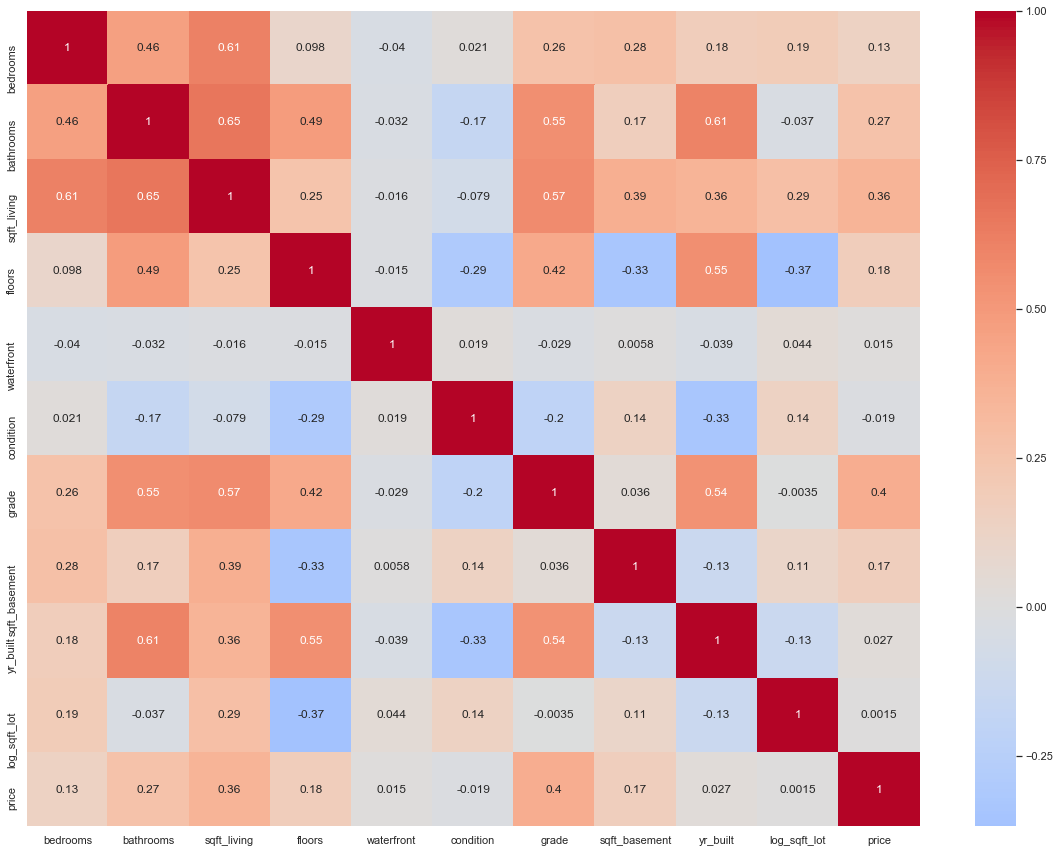

In [48]:
plt.subplots(figsize=(20,15))
sns.heatmap(f_v2_heatmap.corr(), center=0,annot=True, cmap='coolwarm')
plt.show()

There is some mild multicolinearity between total square feet and the number of bedrooms and the number of bathrooms, though this is not significant (using 0.75 as the cutoff).  

### OLS Linear Regression Model

In [49]:
Y = df.price

In [50]:
formula = 'Y ~ bedrooms + bathrooms + sqft_living + floors + condition + grade \
            + sqft_basement + yr_built + waterfront + log_sqft_lot'
model = ols(formula = formula, data = features_v2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     536.8
Date:                Sun, 06 Jun 2021   Prob (F-statistic):               0.00
Time:                        14:18:33   Log-Likelihood:            -1.8454e+05
No. Observations:               14370   AIC:                         3.691e+05
Df Residuals:                   14359   BIC:                         3.692e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2.763e+06   7.63e+04     36.217      0.000    2.61e+06    2.91e+06
bedrooms      -1.391e+04   1198.034    -11.612      0.000   -1.63e+04   -1.16e+04
bathrooms      1.851e+04   1959.477      9.444      0.000    1.47e+04    2.23e+04
sqft_living      36.6214      2.389     15.327      0.000      31.938      41.305
floors          2.81e+04   2199.633     12.773      0.000    2.38e+04    3.24e+04
condition      1329.4912   1307.992      1.016      0.309   -1234.343    3893.325
grade          5.174e+04   1323.910     39.079      0.000    4.91e+04    5.43e+04
sqft_basement    25.6161      2.749      9.318      0.000      20.228      31.005
yr_built      -1426.1156     39.702    -35.921      0.000   -1503.936   -1348.295
waterfront     5.228e+04   2.16e+04      2.416      0.016    9857.844    9.47e+04
log_sqft_lot  -5164.9260   1098.285     -4.703      0.000   -7317.706   -3012.146
==============================================================================
Omnibus:                      644.000   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              309.124
Skew:                           0.156   Prob(JB):                     7.49e-68
Kurtosis:                       2.353   Cond. No.                     2.70e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.7e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Analysis

It's clear from the R^2 score that the model is not the best fit for the data, especially when compared to the model which incorporated zip codes.  That being said, all of the selected features had an effect on the model except for the "condition" feature.  Whether the house was "waterfront" played the most significant role (increasing price by approximately $52k, all else being equal).  A very close second was the grade, having nearly the same effect.  

Bathrooms changed the value by approximately \\$18.5k, and bedrooms (surprisingly) had a lesser effect, swinging the price by approximately \\$14k each.  

However, looking at the model statistics, there are two significant issues: the very high Omnibus (644.0) and the very high Condition (2.70e+05).  Omnibus is difficult to address because it's nonspecific. The high Condition, though, can be an indication of significant multicollinearity. I experimented by reducing the features exhibiting high multicollinearity; however, this only had the effect of significantly decreasing the R^2 while maintaining a high Condition (there is a reduction from the model incorporating zip codes, but not significantly -- from 3.3e+05 to 2.7e+05

The best resource I've found for interpreting Statsmodels' OLS report is linked below.  
https://medium.com/swlh/interpreting-linear-regression-through-statsmodels-summary-4796d359035a